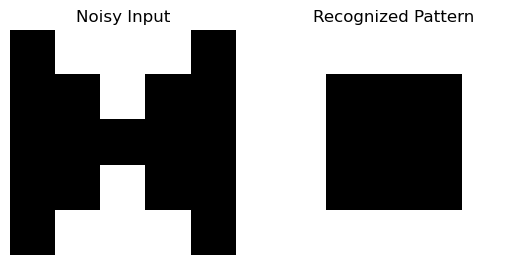

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define binary image patterns (5x5 grids) for three simple shapes: square, triangle, and circle
square = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1]
])

triangle = np.array([
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1]
])

circle = np.array([
    [0, 1, 1, 1, 0],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1],
    [0, 1, 1, 1, 0]
])

# Create a Hopfield network with patterns as memory
patterns = [square, triangle, circle]
num_pixels = patterns[0].size
hopfield_network = np.zeros((num_pixels, num_pixels))

for pattern in patterns:
    pattern_flat = pattern.flatten()
    hopfield_network += np.outer(pattern_flat, pattern_flat) - np.diag(pattern_flat)

# Function to recognize a pattern from a noisy or distorted version
def recognize_pattern(noisy_pattern, max_iterations=10):
    state = noisy_pattern.flatten()
    for _ in range(max_iterations):
        for i in range(num_pixels):
            state[i] = np.sign(np.dot(hopfield_network[i, :], state))

    # Find the most similar stored pattern
    similarities = [np.dot(pattern.flatten(), state) for pattern in patterns]
    recognized_pattern = patterns[np.argmax(similarities)]

    return recognized_pattern

# Example usage:
noisy_square = np.array([
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0]
])

recognized = recognize_pattern(noisy_square)

# Plot the noisy input and the recognized pattern
plt.subplot(1, 2, 1)
plt.imshow(noisy_square, cmap='gray')
plt.title("Noisy Input")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(recognized, cmap='gray')
plt.title("Recognized Pattern")
plt.axis('off')

plt.show()